In [1]:
# import libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re  # For cleaning text
from nltk.corpus import stopwords # For cleaning text
from nltk.stem import WordNetLemmatizer # For cleaning text
import nltk


In [2]:
# Cell 3 (Revised): Load Dataset
import pandas as pd
import os

# ----------------------- Troubleshooting Steps -------------------------
# 1. Print the current working directory
print("Current working directory:", os.getcwd())

# 2. List files in the current directory to verify the filename
print("Files in current directory:", os.listdir())
# -----------------------------------------------------------------------

# load dataset
try:
    df = pd.read_csv("expense_data_1.csv")  # Replace with the actual path to your CSV file
    print(df.head())  # Print the first few rows to verify the data is loaded
    print(df.columns.tolist())
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")
    df = pd.DataFrame()  # Assign an empty DataFrame to df
    print("Created empty DataFrame.")
except Exception as e:  # Catch other potential errors during CSV loading
    print(f"An error occurred: {e}")
    df = pd.DataFrame()
    print("Created empty DataFrame due to an error.")

# Check if DataFrame is empty
if df.empty:
    print("DataFrame is empty. Exiting data processing.")
else:
    # Display first few rows to verify
    print("DataFrame loaded successfully. Here are the first 5 rows:")
    print(df.head())



Current working directory: /home/bradley
Files in current directory: ['.arduinoIDE', '.profile', '.bashrc', '.config', '.grass8', 'snap', '.aspnet', 'Untitled.ipynb', '.lmstudio-home-pointer', '.pki', 'my-jupyter-env', 'sanple2.ipynb', '.bash_history', '.ServiceHub', 'expense_data_1.csv', 'sample1.ipynb', '.wine32', '.bash_logout', '.dotnet', 'Arduino', 'Desktop', '.sudo_as_admin_successful', '.npm', '.ipython', '.yarn', '.MCTranscodingSDK', '.wine', '.arduino15', 'Documents', '.vscode', 'sample.cs', '.lesshsQ', 'TRIALS', 'Public', 'R', 'test', '.gnupg', 'Videos', '.lmstudio', 'Pictures', 'Templates', '.cache', 'nltk_data', '.r', 'notebook_env', '.ipynb_checkpoints', '.picsimlab', '.templateengine', '.var', 'Lightworks', 'course work', 'package.json', '.ssh', 'supply', 'Downloads', '.local', '.npm-global', 'final project', '.jupyter', 'Music', '.nuget', '.yarnrc', '.vscode-react-native', 'library.ipynb', '.wget-hsts', '.Lightworks.thereCanBeOnlyOne']
             Date               Acc

In [11]:
# Data Cleaning and Preprocessing
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()                      # Convert to lowercase
    words = text.split()                     # Split into words
    stop_words = set(stopwords.words('english')) # Get English stop words
    words = [w for w in words if not w in stop_words] # Remove stop words
    lemmatizer = WordNetLemmatizer()            # Initialize lemmatizer
    words = [lemmatizer.lemmatize(w) for w in words] # Lemmatize words (reduce to base form)
    return ' '.join(words)                      # Join words back into a string


In [12]:
import pandas as pd


# ------------------- Data Exploration ---------------------
print("\n--- Data Exploration ---")
print("\nDataFrame Info:")
df.info()  # Get information about the DataFrame (data types, non-null counts)

print("\nDescriptive Statistics (Numerical Columns):")
print(df.describe())  # Get descriptive statistics for numerical columns

print("\nValue Counts for 'Category' column:")
print(df['Category'].value_counts())  # Count the occurrences of each category

print("\nMissing Values:")
print(df.isnull().sum())  # Check for missing values in each column
# -----------------------------------------------------------



--- Data Exploration ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     277 non-null    object 
 1   Account                  277 non-null    object 
 2   Category                 277 non-null    object 
 3   Subcategory              0 non-null      float64
 4   Transaction_Description  273 non-null    object 
 5   INR                      277 non-null    float64
 6   Income/Expense           277 non-null    object 
 7   Note                     0 non-null      float64
 8   Amount                   277 non-null    float64
 9   Currency                 277 non-null    object 
 10  Account.1                277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB

Descriptive Statistics (Numerical Columns):
       Subcategory           INR  Note        Amount

In [3]:
# Cell 13: Handle Missing Values (Revised to check if df exists)
if 'df' in locals() and not df.empty:
    # Drop 'Subcategory' and 'Note' columns as they contain all missing values
    df.drop(['Subcategory', 'Note'], axis=1, inplace=True)

    # Impute missing 'Transaction_Description' values with 'Unknown'
    df['Transaction_Description'].fillna('Unknown', inplace=True)

    print("\n--- Handling Missing Values ---\n")
    print("Updated Missing Values:")
    print(df.isnull().sum())
else:
    print("DataFrame 'df' is not properly loaded, skipping missing value handling.")



--- Handling Missing Values ---

Updated Missing Values:
Date                       0
Account                    0
Category                   0
Transaction_Description    0
INR                        0
Income/Expense             0
Amount                     0
Currency                   0
Account.1                  0
dtype: int64


/tmp/ipykernel_9792/2816142165.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Transaction_Description'].fillna('Unknown', inplace=True)


In [4]:
# Cell 14: Encoding Categorical Data
from sklearn.preprocessing import LabelEncoder

# Encode 'Income/Expense' column
le = LabelEncoder()
df['Income/Expense'] = le.fit_transform(df['Income/Expense'])
# 0: Expense, 1: Income

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['Account', 'Category', 'Currency'], drop_first=True)

print("\n--- Encoding Categorical Data ---\n")
print("First 5 rows after encoding:")
print(df.head())




--- Encoding Categorical Data ---

First 5 rows after encoding:
             Date Transaction_Description    INR  Income/Expense  Amount  \
0  3/2/2022 10:11                 Brownie   50.0               0    50.0   
1  3/2/2022 10:11        To lended people  300.0               0   300.0   
2  3/1/2022 19:50                  Dinner   78.0               0    78.0   
3  3/1/2022 18:56                   Metro   30.0               0    30.0   
4  3/1/2022 18:22                  Snacks   67.0               0    67.0   

   Account.1  Account_Cash  Category_Apparel  Category_Beauty  \
0       50.0         False             False            False   
1      300.0         False             False            False   
2       78.0         False             False            False   
3       30.0         False             False            False   
4       67.0         False             False            False   

   Category_Education  Category_Food  Category_Gift  Category_Household  \
0           

In [6]:
# Cell 15: Text Cleaning on 'Transaction_Description'
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    WordNetLemmatizer().lemmatize('example')
except LookupError:
    nltk.download('wordnet')
    nltk.download('omw-1.4')

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))  # Convert to string and remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    stop_words = set(stopwords.words('english'))  # Get English stop words
    words = [w for w in words if not w in stop_words]  # Remove stop words
    lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer
    words = [lemmatizer.lemmatize(w) for w in words]  # Lemmatize words (reduce to base form)
    return ' '.join(words)  # Join words back into a string

df['Transaction_Description'] = df['Transaction_Description'].apply(clean_text)

print("\n--- Text Cleaning on Transaction_Description ---\n")
print("First 5 rows after text cleaning:")
print(df['Transaction_Description'].head())




--- Text Cleaning on Transaction_Description ---

First 5 rows after text cleaning:
0          brownie
1    lended people
2           dinner
3            metro
4            snack
Name: Transaction_Description, dtype: object


In [7]:
# Cell 16: Feature Scaling (Normalization)

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical columns
numerical_cols = ['INR', 'Amount', 'Account.1']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("\n--- Feature Scaling ---\n")
print("First 5 rows after scaling:")
print(df.head())




--- Feature Scaling ---

First 5 rows after scaling:
             Date Transaction_Description       INR  Income/Expense    Amount  \
0  3/2/2022 10:11                 brownie -0.339105               0 -0.335542   
1  3/2/2022 10:11           lended people -0.104106               0 -0.100410   
2  3/1/2022 19:50                  dinner -0.312785               0 -0.309207   
3  3/1/2022 18:56                   metro -0.357905               0 -0.354352   
4  3/1/2022 18:22                   snack -0.323125               0 -0.319553   

   Account.1  Account_Cash  Category_Apparel  Category_Beauty  \
0  -0.335542         False             False            False   
1  -0.100410         False             False            False   
2  -0.309207         False             False            False   
3  -0.354352         False             False            False   
4  -0.319553         False             False            False   

   Category_Education  Category_Food  Category_Gift  Category_Househ

In [8]:
# Cell 17: Final Checks

print("\n--- Final Checks ---\n")
print("DataFrame Info after preprocessing:")
df.info()

print("\nFirst 5 rows of the preprocessed DataFrame:")
print(df.head())

# Save the preprocessed DataFrame to a new CSV file
df.to_csv('preprocessed_expense_data.csv', index=False)

print("\nPreprocessed data saved to 'preprocessed_expense_data.csv'")



--- Final Checks ---

DataFrame Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       277 non-null    object 
 1   Transaction_Description    277 non-null    object 
 2   INR                        277 non-null    float64
 3   Income/Expense             277 non-null    int64  
 4   Amount                     277 non-null    float64
 5   Account.1                  277 non-null    float64
 6   Account_Cash               277 non-null    bool   
 7   Category_Apparel           277 non-null    bool   
 8   Category_Beauty            277 non-null    bool   
 9   Category_Education         277 non-null    bool   
 10  Category_Food              277 non-null    bool   
 11  Category_Gift              277 non-null    bool   
 12  Category_Household         277 non-null    bool

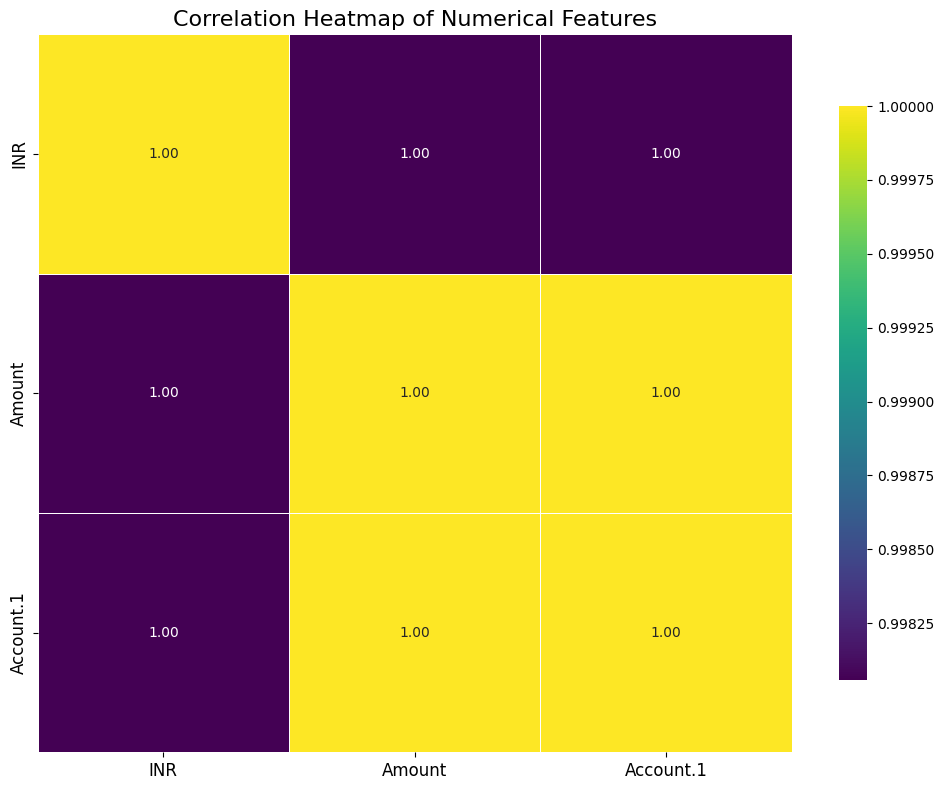

In [10]:
# Cell 12a: Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Cell 12b: Calculate the correlation matrix
# Only compute correlation if the DataFrame exists and is not empty
if 'df' in locals() and not df.empty:
    correlation_matrix = df[['INR', 'Amount', 'Account.1']].corr()

    # Cell 12c: Plot the heatmap
    plt.figure(figsize=(10, 8))  # Increased figure size for better readability
    sns.heatmap(correlation_matrix,
                annot=True,       # Display correlation values
                cmap='viridis',   # Use a more visually appealing colormap
                fmt=".2f",        # Format the annotations to two decimal places
                linewidths=.5,    # Add slight linewidths for better separation
                linecolor='white',  # Use white lines
                cbar_kws={'shrink': 0.8})  # Adjust colorbar size

    plt.title('Correlation Heatmap of Numerical Features', fontsize=16)  # Enlarged title
    plt.xticks(fontsize=12)  # Enlarged x-axis tick labels
    plt.yticks(fontsize=12)  # Enlarged y-axis tick labels
    plt.tight_layout()       # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("DataFrame 'df' not found. Ensure data loading is successful before plotting.")
